In [1]:
from bs4 import BeautifulSoup as soup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt 

In [2]:
executable_path = {'executable_path':ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = html = browser.html
html_soup = soup(html, 'html.parser')

In [3]:
# Find table element in webpage
table= html_soup.find('table')
header_row = table.findAll('th')
print(header_row)

[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]


In [4]:
# Extract the column names from the header row
column_names = []
for names in header_row:
    column_names.append(names.text)
print(column_names)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [5]:
# Create empty list to store data
data = []

# loop through each row in table
for row in table.find_all('tr'):
    # Initialize an empty list to store the data for each row
    row_data = []
    # Loop through each cell in the row
    for cell in row.find_all('td'):
    # Add the cell data to the row data
        row_data.append(cell.text)
        # Add the row data to the overall data
        data.append(row_data)

# print(data)

In [6]:
# Create pandas DataFrame from scraped data
import pandas as pd
df = pd.DataFrame(data, columns=column_names)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,2,2012-08-16,10,155,6,-75.0,739.0
2,2,2012-08-16,10,155,6,-75.0,739.0
3,2,2012-08-16,10,155,6,-75.0,739.0
4,2,2012-08-16,10,155,6,-75.0,739.0
...,...,...,...,...,...,...,...
13064,1895,2018-02-27,1977,135,5,-77.0,727.0
13065,1895,2018-02-27,1977,135,5,-77.0,727.0
13066,1895,2018-02-27,1977,135,5,-77.0,727.0
13067,1895,2018-02-27,1977,135,5,-77.0,727.0


In [7]:
# Examine data types
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [16]:
# Convert the 'id' column to int, 'sol' and 'ls' columns to float, and 'terrestrial_date' and 'month'
# columns to datetime

df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(float)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['month'] = df['month'].astype(int)

print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [9]:
# 1. How many months exist on Mars?
print(f'There are {df["month"].nunique()} months on Mars.')

There are 12 months on Mars.


In [20]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
print(f'There are {df["sol"].max()} Martian days worth of data.')

There are 1977.0 Martian days worth of data.


In [13]:
# 3a. Find the average minimum temperature for each month
monthly_temps = df.groupby('month')['min_temp'].mean().reset_index()
print(monthly_temps)


    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


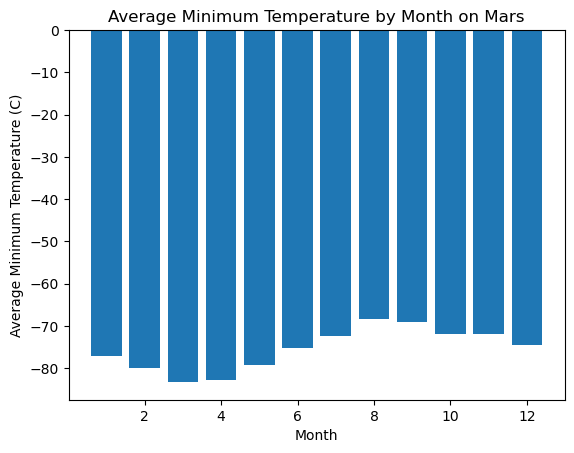

In [14]:
# 3b. Plot the average minimum temperature for each month

plt.bar(monthly_temps['month'], monthly_temps['min_temp'])
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.show()

In [17]:
# 4a. Find the average atmospheric pressure for each month
monthly_pressures = df.groupby('month')['pressure'].mean().reset_index()
print(monthly_pressures)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


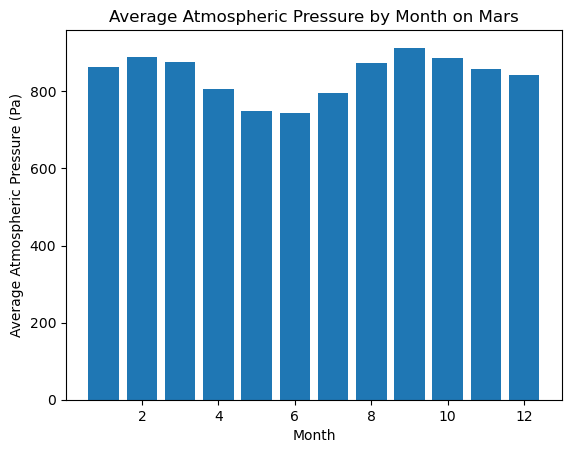

In [18]:
# 4b. Plot the average atmospheric pressure for each month

plt.bar(monthly_pressures['month'], monthly_pressures['pressure'])
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.show()

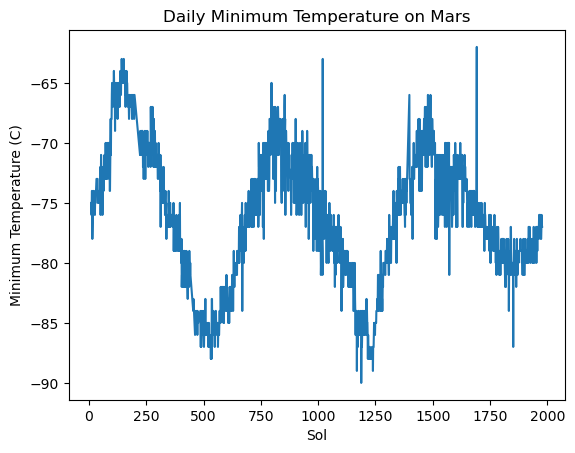

In [19]:
# 5. Plot the daily minimum temperature to visually estimate the number of days in a Martian year

plt.plot(df['sol'], df['min_temp'])
plt.xlabel('Sol')
plt.ylabel('Minimum Temperature (C)')
plt.title('Daily Minimum Temperature on Mars')
plt.show()


In [21]:
# Export the DataFrame to a CSV file
df.to_csv('mars_data.csv', encoding='utf-8')

In [22]:
browser.quit()